In [1]:
import random 
import numpy as np 
import matplotlib.pyplot as plt

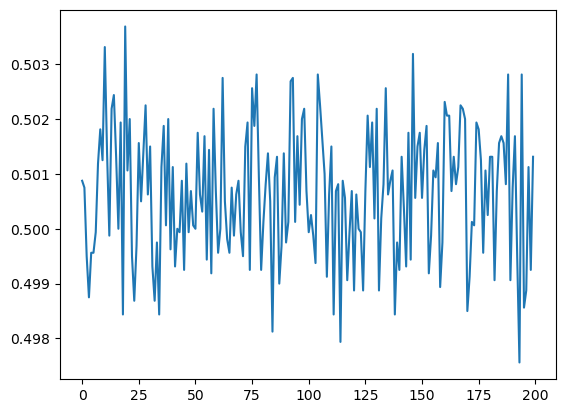

KeyError: 'NOT'

In [5]:
DATA = np.genfromtxt('Paridad.csv', delimiter=',')
MAX_PROF = 10
funciones = ["AND", "OR", "NOT"]
terminales = ["A", "B", "C"]
aridad = {"AND": 2, "OR": 2, "NOT":1, "A":0, "B":0, "C":0}
tipo_nodo = ["Terminal", "Funcion"]

def and_f(x,y):
    return (x and y)

def or_f(x,y):
    return (x or y)

def not_f(x):
    return not(x)

def nor_f(x,y):
    return not(x or y)


def crear_func(max_nodos=10):
    num_nodos = random.choice(range(2, max_nodos))
    individuo = []
    sum_aridades = 0
    nodo_inicial = random.choice(funciones)
    individuo.append(nodo_inicial)
    sum_aridades = aridad[nodo_inicial]
    for i in range(num_nodos):
        if sum_aridades ==0:
            break
        def_nodo = random.choice(tipo_nodo)
        if def_nodo == "Terminal" or ((num_nodos-len(individuo)) <=sum_aridades):
            nodo = random.choice(terminales)
            individuo.append(nodo)
            sum_aridades = sum_aridades - 1 + aridad[nodo]
        else:
            def_nodo == "Funcion"
            nodo = random.choice(funciones)
            individuo.append(nodo)
            sum_aridades = sum_aridades - 1 + aridad[nodo]
    return individuo

def recortar_individuo(ind_test):
    individuo_recortado = ind_test[:MAX_PROF]
    sum_aridades = 0

    for i, nodo in enumerate(individuo_recortado):

        if (sum_aridades+aridad[nodo]) > MAX_PROF-i-1:
            break
        elif i != 0:
            sum_aridades = sum_aridades + aridad[nodo] -1
        else:
            sum_aridades = sum_aridades + aridad[nodo]
        # print("sum_aridades", sum_aridades)
        # print("restantes: " , MAX_PROF-i)
    # print(i)
    # print(sum_aridades)
    for j in range(i, len(individuo_recortado)):
        if sum_aridades == 0:
            # print("break")
            # print("j: ", j)
            # print("i: ", i)
            return individuo_recortado[:j]
        individuo_recortado[j] = random.choice(terminales)
        sum_aridades-= 1
    return individuo_recortado

def encontrar_expresion(individuo, indice):
    '''
    Funcion que recibe individuo y un indice y retorna el siguiente indice donde la aridad de 0 
    para asegurarse que lo que esté entre los indices sea una expresion completa 
    '''
    sum_aridades = 1
    for i, nodo in enumerate(individuo[indice:], indice):
        sum_aridades = sum_aridades + aridad[nodo] -1
        if sum_aridades == 0:
            return i

def reverse_polish_notation(expression):
    '''
    Funcion que recibe expresion y retorna la notacion con los parentesis y poder evaluar
    '''
    stack = []
    operators = {'AND', 'OR', 'NOT'}

    for item in reversed(expression):
        if item not in operators:
            stack.append(item)
        else:
            if item == 'NOT':
                operand = stack.pop()
                result = ['NOT', operand]
            else:
                operand2 = stack.pop()
                operand1 = stack.pop()
                result = [item, operand1, operand2]
            stack.append(result)

    return stack.pop()

def evaluar_individuo(individuo, entradas):
    if isinstance(individuo, str):
        return entradas[individuo]
    else:
        nombre_funcion = individuo[0]
        # print("Nombre funcion: ", nombre_funcion)
        # print("Individuo: ", individuo)
        if nombre_funcion == 'AND':
            return and_f(evaluar_individuo(individuo[1], entradas), evaluar_individuo(individuo[2], entradas))
        elif nombre_funcion == 'OR':
            return or_f(evaluar_individuo(individuo[1], entradas), evaluar_individuo(individuo[2], entradas))
        elif nombre_funcion == 'NOT':
            return not_f(evaluar_individuo(individuo[1], entradas))
        elif nombre_funcion == 'NOR':
            return nor_f(evaluar_individuo(individuo[1], entradas), evaluar_individuo(individuo[2], entradas))
   
def evaluar_arbol_completo(arbol):
    # funcion que evalua el arbol para todas las combinaciones de la tabla de verdad
    correctas = 0
    incorrectas = 0
    for i in DATA:
        entradas = {'A': i[0], 'B': i[1], 'C': i[2]}
        prediccion = evaluar_individuo(arbol, entradas)
        # print("Prediccion: ", prediccion)
        # print("Respuesta esperada: ", i[3])
        if prediccion == i[3]:
            correctas += 1
        else:
            incorrectas += 1
    fitness = correctas/(correctas+incorrectas)
    # print("Correctas: ", correctas)
    # print("Incorrectas: ", incorrectas)
    # print("Porcentaje de acierto: ",fitness)
    return fitness

def seleccion_ruleta(poblacion, fitness):
    '''
    Funcion que recibe la poblacion y el fitness de la poblacion y retorna un individuo seleccionado
    '''
    total_fitness = sum(fitness)
    ruleta = random.uniform(0, total_fitness)
    acumulado = 0
    for i, fit in enumerate(fitness):
        acumulado += fit
        if acumulado >= ruleta:
            return poblacion[i]
        
def mutacion(individuo):
    # Entontrar punto para realizar mutacion 
    # print("Individuo a mutar: ", individuo)
    individuo_mutado = individuo.copy()
    punto = random.choice(range(len(individuo)))
    # print("Punto mutacion: ", punto)
    # Evaluar todos los nodos que se tendran que modificar a partir del punto
    punto_final = encontrar_expresion(individuo, punto)
    # print("Punto final: ", punto_final)
    # print("Individuo: ", individuo)
    # Crear expresion de mutacion 
    mutacion = crear_func()
    # Insertar mutacion en el individuo
    individuo_mutado[punto:punto_final+1] = mutacion
    return individuo_mutado

def cruce(padre1, padre2):
    '''
    Funcion que recibe dos individuos y retorna dos hijos
    '''
    hijo1 = padre1.copy()
    hijo2 = padre2.copy()
    punto_p1 = random.choice(range(len(padre1)))
    punto_p2 = random.choice(range(len(padre2)))
    punto_final_p1 = encontrar_expresion(padre1, punto_p1)
    punto_final_p2 = encontrar_expresion(padre2, punto_p2)
    hijo1[punto_p1:punto_final_p1+1] = padre2[punto_p2:punto_final_p2+1]
    hijo2[punto_p2:punto_final_p2+1] = padre1[punto_p1:punto_final_p1+1]
    return hijo1, hijo2

def correr_generaciones(num_poblacion, num_generaciones):
    fitness_generaciones = []
    poblacion = [crear_func() for i in range(num_poblacion)]
    for i in range(num_generaciones):
        fitness = []
        for individuo in poblacion:
            fitness.append(evaluar_arbol_completo(reverse_polish_notation(individuo)))
        fitness_generaciones.append(fitness)
        nueva_poblacion = []
        for i in range(num_poblacion):
            padre1 = seleccion_ruleta(poblacion, fitness)
            padre2 = seleccion_ruleta(poblacion, fitness)
            hijo1, hijo2 = cruce(padre1, padre2)
            # print("Hijo1: ", hijo1)
            # print("Hijo2: ", hijo2)
            hijo1 = mutacion(hijo1)
            hijo2 = mutacion(hijo2)
            if len(hijo1)> MAX_PROF:
                hijo1 = recortar_individuo(hijo1)
            if len(hijo2)> MAX_PROF:
                hijo2 = recortar_individuo(hijo2)
            nueva_poblacion.append(hijo1)
            nueva_poblacion.append(hijo2)
        poblacion = nueva_poblacion
    return poblacion, fitness_generaciones

def graficar_fitness(fitness_generaciones):
    plt.plot(range(len(fitness_generaciones)), [np.mean(fitness) for fitness in fitness_generaciones])
    plt.show()

def main():
    poblacion, fitness_generaciones = correr_generaciones(1000, 200)
    graficar_fitness(fitness_generaciones)
    mejor_individuo = max(poblacion, key=lambda x: evaluar_arbol_completo(x))
    print(mejor_individuo)
    print(evaluar_arbol_completo(mejor_individuo))
    print(reverse_polish_notation(mejor_individuo))

main()




        








In [ ]:
poblacion = [crear_func() for i in range(10)]
entradas = {'A': True, 'B': False, 'C': True}




In [ ]:
poblacion

In [ ]:
individuo1 = crear_func()
print(individuo1)

In [ ]:
conv_ind = reverse_polish_notation(individuo1)
entradas = {'A': True, 'B': False, 'C': True}

c


In [ ]:
print(conv_ind)

In [ ]:
if isinstance("hola", str):
    print("es terminal")

In [ ]:
conv_ind[2]

In [ ]:
type("DFAS")

In [ ]:
ind_test = ['NOT', 'OR', 'AND', 'C', 'AND', 'B', 'OR', 'B', 'C', 'A']
punto = 3
punto_final = encontrar_expresion(ind_test, punto)

In [ ]:
ind_test2 = ind_test.copy()
mutacion = ["AND", "A", "B"]
ind_test2[punto:punto_final+1] = mutacion
print(ind_test2)
# ["NOT", "OR", "Z", "X", "Y", "A"]

In [ ]:
MAX_PROF = 10
individuo = crear_func(MAX_PROF)
print(individuo)



In [ ]:
ind_test = ['NOT', 'OR', 'AND', 'C', 'AND', 'B', 'OR', 'B', 'C', 'A']

In [ ]:
MAX_PROF = 10
def recortar_individuo(ind_test):
    individuo_recortado = ind_test[:MAX_PROF]
    sum_aridades = 0

    for i, nodo in enumerate(individuo_recortado):

        if (sum_aridades+aridad[nodo]) > MAX_PROF-i-1:
            break
        elif i != 0:
            sum_aridades = sum_aridades + aridad[nodo] -1
        else:
            sum_aridades = sum_aridades + aridad[nodo]
        print("sum_aridades", sum_aridades)
        print("restantes: " , MAX_PROF-i)
    print(i)
    print(sum_aridades)
    for j in range(i, len(individuo_recortado)):
        if sum_aridades == 0:
            # print("break")
            # print("j: ", j)
            # print("i: ", i)
            return individuo_recortado[:j]
        individuo_recortado[j] = random.choice(terminales)
        sum_aridades-= 1
    return individuo_recortado




ind_rec = recortar_individuo(ind_test)
print(ind_rec)





In [ ]:
individuo_recortado

In [ ]:
for i, j in enumerate(individuo_recortado,1):
    print(i, j)

In [ ]:
def encontrar_expresion(individuo, indice):
    '''
    Funcion que recibe individuo y un indice y retorna el siguiente indice donde la aridad de 0 
    para asegurarse que lo que esté entre los indices sea una expresion completa 
    '''
    sum_aridades = 1
    for i, nodo in enumerate(individuo[indice:], indice):
        sum_aridades = sum_aridades + aridad[nodo] -1
        if sum_aridades == 0:
            return i


ind_test = ['NOT', 'OR', 'AND', 'C', 'AND', 'B', 'OR', 'B', 'C', 'A']

indice_final = encontrar_expresion(ind_test, 3)
print(indice_final)

In [ ]:
def eval_polish(expr):
    stack = []
    operators = {
        'NOT': lambda x: not x,
        'AND': lambda x, y: x and y,
        'OR': lambda x, y: x or y,
    }
    variables = {
        'A': True,  # Replace with the actual value
        'B': True, # Replace with the actual value
        'C': False,  # Replace with the actual value
    }

    for token in reversed(expr):
        if token in operators:
            if token == 'NOT':
                operand = stack.pop()
                stack.append(operators[token](operand))
            else:
                operand1 = stack.pop()
                operand2 = stack.pop()
                stack.append(operators[token](operand1, operand2))
        else:
            stack.append(variables[token])

    return stack[0]


expr = ['AND', 'AND', 'C']
print(eval_polish(expr))  # Output: True

In [ ]:
def reverse_polish_notation(expression):
    stack = []
    operators = {'AND', 'OR', 'NOT'}

    for item in reversed(expression):
        if item not in operators:
            stack.append(item)
        else:
            if item == 'NOT':
                operand = stack.pop()
                result = ['NOT', operand]
            else:
                operand2 = stack.pop()
                operand1 = stack.pop()
                result = [item, operand1, operand2]
            stack.append(result)

    return stack.pop()

expression = ['NOT', 'OR', 'AND', 'C', 'AND', 'B', 'OR', 'B', 'C', 'A']
result = reverse_polish_notation(expression)
print(result)


In [ ]:
s = []
op = s.pop


In [ ]:
s.append(True) 
s

In [ ]:
a = [1,2,3,4,5,6,7,8,9,10]
a.pop

In [ ]:
a

In [ ]:
b = a.pop()

In [ ]:
b

In [ ]:
a

In [ ]:
['NOT', 'OR', 'AND', 'C', 'AND', 'B', 'OR', 'B', 'C', 'A']

abs - + c + b - b c a

In [ ]:
def prefixToInfix(prefix):
    stack = []
     
    # read prefix in reverse order
    i = len(prefix) - 1
    while i >= 0:
        if not isOperator(prefix[i]):
             
            # symbol is operand
            stack.append(prefix[i])
            i -= 1
        else:
           
            # symbol is operator
            str = "(" + stack.pop() + prefix[i] + stack.pop() + ")"
            stack.append(str)
            i -= 1
     
    return stack.pop()
 
def isOperator(c):
    if c == "*" or c == "+" or c == "-" or c == "/" or c == "^" or c == "(" or c == ")":
        return True
    else:
        return False
 
# Driver code
if __name__=="__main__":
    str = "-+c+b-bca"
    print(prefixToInfix(str))

In [ ]:
ind_test = ['NOT', 'OR', 'AND', 'C', 'AND', 'B', 'OR', 'B', 'C', 'A']
punto1 = 2
punto2 = encontrar_expresion(ind_test, punto1)
print(ind_test[punto1:punto2+1])

In [ ]:
ind_rec = ['AND', 'NOT', 'C', 'C']
ind_rec2 = recortar_individuo(ind_rec)
print(ind_rec2)

In [ ]:
def recortar_individuo(ind_test):
    individuo_recortado = ind_test[:MAX_PROF]
    sum_aridades = 0

    for i, nodo in enumerate(individuo_recortado):

        if (sum_aridades+aridad[nodo]) > MAX_PROF-i-1:
            break
        elif i != 0:
            sum_aridades = sum_aridades + aridad[nodo] -1
        else:
            sum_aridades = sum_aridades + aridad[nodo]
        # print("sum_aridades", sum_aridades)
        # print("restantes: " , MAX_PROF-i)
    # print(i)
    # print(sum_aridades)
    for j in range(i, len(individuo_recortado)):
        if sum_aridades == 0:
            # print("break")
            # print("j: ", j)
            # print("i: ", i)
            return individuo_recortado[:j]
        individuo_recortado[j] = random.choice(terminales)
        sum_aridades-= 1
    return individuo_recortado